<a href="https://colab.research.google.com/github/karsarobert/MachineLearning2025/blob/main/PTE_ML6_Feladatokkal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 6. Gyakorlat: Logisztikus regresszió
### 2025. október 13.

#Logisztikus regresszió

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/diabetes.csv') # adatok betöltése

y = df.label #X,y beállítása
X= df.drop(['label'], axis = 1)
df


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) # tréning és validációs adatkészletek beállítása

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000) # logisztikus regressziós modell létrehozása
model.fit(X_train, y_train) # modell illesztése
y_pred=model.predict(X_test) # előrejelzések kiszámítása a teszt készleten


In [5]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # zavartsági mártix

pd.DataFrame(cnf_matrix)

,0,1
0,98,9
1,18,29


In [6]:
y_pred.sum()

np.int64(38)

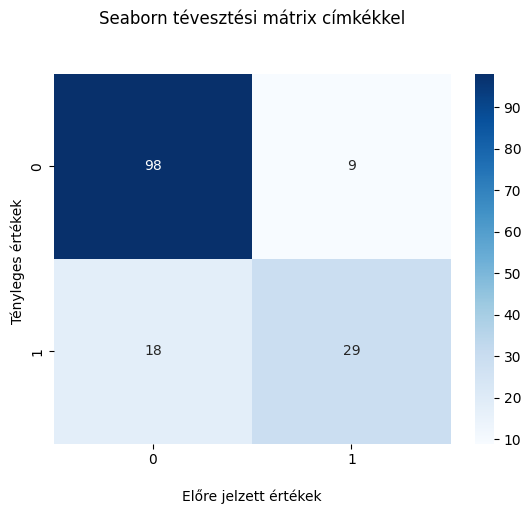

In [7]:
import seaborn as sns # zavartsági mátrix grafikon rajzolása

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn tévesztési mátrix címkékkel\n\n');
ax.set_xlabel('\nElőre jelzett értékek')
ax.set_ylabel('Tényleges értékek ');

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Itt a + jelöli a beteget (1 logikai érték), a - az egészségeset (0 logikai érték)
<div class=mobile-container>
<table style="margin-left: 10%">
<colgroup><col width=120px>
<col width=50px>
<col width=200px>
<col width=200px>
</colgroup><tbody>
<tr style="border-top: 0px">
<td align=center colspan=2 rowspan=2 style="background: rgba(255, 255, 255, 1);border: 0px"></td>
<td align=center colspan=2 style="background: rgba(255, 255, 255, 1);border: 1px"><b>Prediktált</b> osztály (betegséget keresünk)</td>
</tr>
<tr style="border-top: 0px">
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px"><b>+ (a modell szerint beteg)</b></td>
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px"><b>- (a modell szerint egészséges)</b></td>
</tr>
<tr style="border-top: 0px">
<td align=center rowspan=2 style="border: 0px"><b>Tényleges</b> osztály</td>
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px;"><b>+ (valóban beteg)</b></td>
<td align=center style="background: rgba(0, 255, 0, 0.15);border: 0px;"><b>TP</b><br>True Positives<br>a modell helyesen döntött</td>
<td align=center style="background: rgba(255, 0, 0, 0.25);border: 0px;"><b>FN</b><br>False Negatives<br>Type II error<br>a modell szerint egészséges, valójában beteg</td>
</tr>
<tr style="border-top: 0px">
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px;"><b>- (valóban egészséges)</b></td>
<td align=center style="background: rgba(255, 0, 0, 0.25);border: 0px;"><b>FP</b><br>False Positives<br>Type I error<br>a modell szerint beteg, pedig egészséges</td>
<td align=center style="background: rgba(0, 255, 0, 0.15);border: 0px;"><b>TN</b><br>True Negatives<br>a modell helyesen döntött</td>
</tr>
</tbody>
</table>
</div>

</div>
<br>
<p><span class="new-item item-r">Főbb mérőszámok:</span> Az osztályozási modellek teljesítményének értékelésére általában a következő mérőszámokat használják:</p>
<div class=mobile-container>
<center>
<table>
<colgroup><col width=200px>
<col width=200px>
<col width=200px>

<tbody>
<tr>
<td align=center><b>Metrika</b></td>
<td align=center><b>Számítása                             </b></td>
<td align=center><b>Érelmezés</b></td>
</tr>
<tr>
<td align=center>Accuracy</td>
<td align=center>$\displaystyle\frac{\textrm{TP}+\textrm{TN}}{\textrm{TP}+\textrm{TN}+\textrm{FP}+\textrm{FN}}$</td>
<td align=left>A modell általános teljesítménye</td>
</tr>
<tr>
<td align=center>Precision</td>
<td align=center>$\displaystyle\frac{\textrm{TP}}{\textrm{TP}+\textrm{FP}}$</td>
<td align=left>Mennyire pontosak a pozitív előrejelzések</td>
</tr>
<tr>
<td align=center>Recall<br>Sensitivity</td>
<td align=center>$\displaystyle\frac{\textrm{TP}}{\textrm{TP}+\textrm{FN}}$</td>
<td align=left>A tényleges pozitív minta lefedettsége</td>
</tr>
<tr>
<td align=center>Specificity</td>
<td align=center>$\displaystyle\frac{\textrm{TN}}{\textrm{TN}+\textrm{FP}}$</td>
<td align=left>A tényleges negatív minta lefedettsége</td>
</tr>
<tr>
<td align=center>F1 score</td>
<td align=center>$\displaystyle\frac{2\textrm{TP}}{2\textrm{TP}+\textrm{FP}+\textrm{FN}}$</td>
<td align=left>Hibrid metrika hasznos a kiegyensúlyozatlan osztályok esetében</td>
</tr>
</tbody>
</table>
</center>
</div>

#Accuracy
Az Accuracy a helyes találatok arányát mutatja az összes objektumhoz viszonyítva, míg az
Error rate a helytelen találatok arányát az összes objektumhoz képest.
Az Accuracy és az Error rate nagyon általános mutatók, az alkalmazási terület sajátosságaira vonatkozóan nem mindig kellően informatívak. Nem használható e két kritérium akkor sem, ha a célosztály mérete kicsi a
teljes halmazhoz képest. Például egy ritka betegség esetén, ha 100 ezerből 10 személy
tartozik a becsült osztályba, akkor is 99.99%-os Accuracyt kapunk, ha egyszer sem találjuk
el a célosztályt, hiszen nagyon sok TN van!
#Sensitivity
A Sensitivityt valódi pozitív rátának is nevezik, mert a célosztályba helyesen besorolt objektumok arányát fejezi a ki az összes, valóban a célosztályba tartozó objektumhoz képest.
#Specifity
A Specificity pedig a valódi negatív ráta, mert a nem célosztályba helyesen besorolt objektumok arányát fejezi ki az összes valóban nem a célosztályba tartozó objektumhoz képest.
# A mutatók tágabb értelmezése
A Sensitivity a besorolás „agresszivitását” fejezi ki. Egy klasszifikáció „agresszív”, ha
minden, kicsit is „gyanús” megfigyelést a célosztályba sorol (pl. egy e-mail-folyam spam/nem
spam osztályozása, ahol minden, kicsit is spamgyanús levelet a modell a spam kategóriába
sorol), vagy nagyon konzervatív, amikor túl sok objektum (spam) átmegy a szűrőn.
A Precision a modell predikciós értéke, azt mutatja, hogy a modell mennyire korrektül
sorol be egy pozitív megfigyelést a pozitív célosztályba. Ha ez az érték alacsony, akkor túl
sok a tévedés, pl. egy keresőmotor esetén.
A Recall azt mutatja, hogy az eredmény mennyire teljes. Értéke ugyanaz, mint a
sensitivity értéke, csak más az értelmezése. Ha magas az értéke, akkor sok pozitív megfigyelés kap korrekt besorolást.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/341px-Sensitivity_and_specificity_1.01.svg.png)

# Milyen metrikákkal lehet mérni a modell teljesítményét
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

Képzeld el, hogy egy orvosi diagnosztikai tesztet vizsgálunk, amelynek célja a rák kimutatása. A teszt két eredményt adhat: pozitív (rák) vagy negatív (nem rák).

A valódi pozitív ráta (TPR) az a valószínűség, hogy a teszt helyesen azonosítja a rákos betegeket (azaz pozitív eredményt ad).
A hamis pozitív ráta (FPR) az a valószínűség, hogy a teszt tévesen azonosítja az egészséges embereket rákos betegként (azaz pozitív eredményt ad).

In [ ]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()


#A ROC-görbe
A ROC (Receiver Operating Characteristic) a valódi pozitívak aránya és a fals pozitívak
aránya közötti kapcsolatot jellemzi. Az elnevezést a radartechnológiában vezették be, a
valódi szignálok és a fals riasztások megkülönböztetésére szolgál.
Minthogy a tengelyeken használt mértékek ekvivalensek a Sensitivityvel és az
(1-Specificity)-vel, sensitivity/specificity diagramnak is nevezik.
Minél távolabb van a ROC-görbe a 45o-os egyenestől a felső háromszögben, annál hatékonyabbnak tartjuk a modellt.
A modell megfelelőségére jellemző az AUC (area under the curve) is, azaz a ROCgörbe alatti terület. Ha az AUC értéke 0.6, vagy kisebb, a modell gyakorlatilag nem ad jobb
eredményt, mint a random osztályozás. Úgy tekintjük, hogy a modell jól használható, ha az
AUC-érték 0.9–1 között van.

#Feladat

A filmipar jelentős kihívásokkal szembesül a filmek sikerének előrejelzésében egy versenyképes piacon. A filmbevételeket befolyásoló kulcsfontosságú tényezők megértése elengedhetetlen a producerek, stúdiók és befektetők számára a stratégiai döntések meghozatalához. Ezért prediktív modellezésre van szükség a film sikerét meghatározó változók, például a költségvetés, a marketingkiadások, a film hossza, valamint a főszereplők, rendezők és kritikusok értékeléseinek azonosításához. Ez a tanulmány egy olyan osztályozási modell kidolgozását tűzi ki célul, amely a korábbi adatok alapján képes előre jelezni a filmek bevételeinek sikerét, ezáltal mélyebb betekintést nyújtva azokba a tényezőkbe, amelyek meghatározzák a filmek sikerét a mozipénztáraknál.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/Movie_classification.csv", header=0)
df.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


#Elemezzük az adatokat!!!
adattípusok,
hiányzó adat,
adatok terjedelme,
korrelláció,
hisztogrammok
szükséges-e minden adat?
milyen adatátalakításokat kell megtenni?


#Adatok előkészítése


#Modell futtatása, validáció
